In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from kid_readout.interactive import *

In [91]:
import glob
import pandas as pd
import seaborn as sns

In [100]:
sns.set_context('notebook')
sns.set(font_scale=1.5)

In [6]:
fns = glob.glob('/artemis/readout/2016-11-*_dB_dac.nc')
fns.sort()

In [8]:
dfs = []
for fn in fns:
    try:
        ncf = NCFile(fn)
        print fn
    except Exception:
        print "bad: ", fn
        continue
    ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)
    dfs.append(ssa.to_dataframe())
    ncf.close()

bad:  /artemis/readout/2016-11-16_142014_40_dB_dac.nc
/artemis/readout/2016-11-16_142153_40_dB_dac.nc
/artemis/readout/2016-11-16_142503_36_dB_dac.nc
/artemis/readout/2016-11-16_142810_30_dB_dac.nc
/artemis/readout/2016-11-16_143118_26_dB_dac.nc
/artemis/readout/2016-11-16_143425_22_dB_dac.nc
/artemis/readout/2016-11-16_144926_36_dB_dac.nc
/artemis/readout/2016-11-16_145238_30_dB_dac.nc
/artemis/readout/2016-11-16_145546_27_dB_dac.nc
/artemis/readout/2016-11-16_145850_24_dB_dac.nc
/artemis/readout/2016-11-16_152920_36_dB_dac.nc
/artemis/readout/2016-11-16_153225_30_dB_dac.nc
/artemis/readout/2016-11-16_153528_27_dB_dac.nc
/artemis/readout/2016-11-16_153831_24_dB_dac.nc
/artemis/readout/2016-11-16_173203_36_dB_dac.nc
/artemis/readout/2016-11-16_173509_30_dB_dac.nc
/artemis/readout/2016-11-16_173815_27_dB_dac.nc
/artemis/readout/2016-11-16_174121_24_dB_dac.nc
/artemis/readout/2016-11-16_220159_36_dB_dac.nc
/artemis/readout/2016-11-16_220506_30_dB_dac.nc
/artemis/readout/2016-11-16_220810

In [10]:
df = pd.concat(dfs,ignore_index=True)

In [11]:
df.shape

(360, 63)

In [68]:
valid = df[(df.number<6) & (df.res_Q > 3000) & ((df.index>125) | (df.index<120))]

In [69]:
valid.shape

(252, 63)

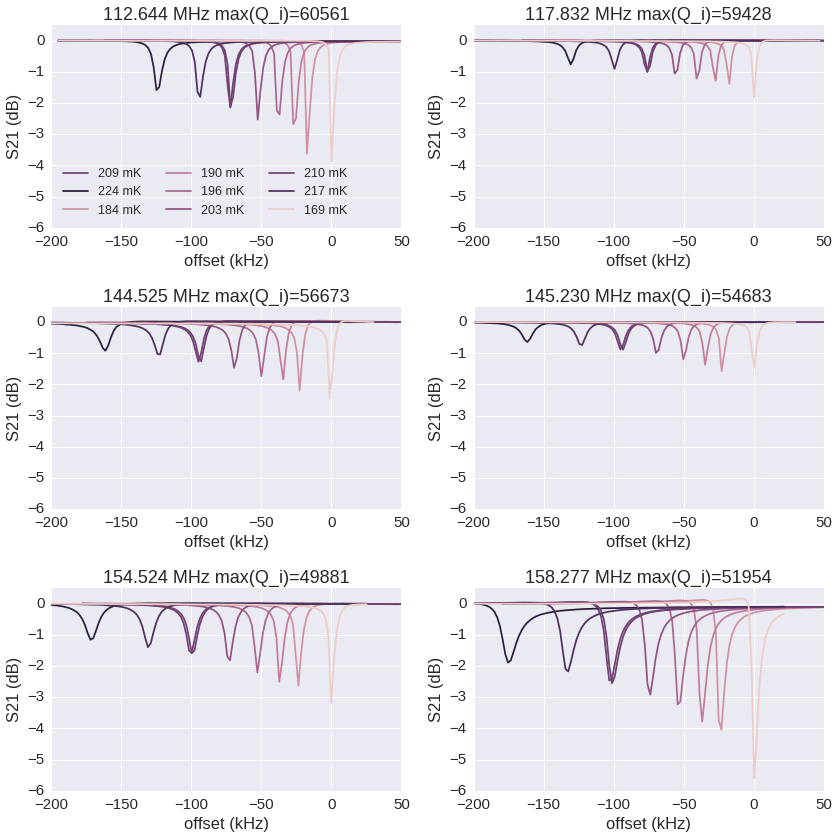

In [154]:
pal = sns.cubehelix_palette(as_cmap=True)
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==27)]
    for m,row in dd.iterrows():
        ax.plot((row.res_frequency_data-dd.res_f_0.max())/1e3,dB(row.res_s21_data)-max([dB(row.res_s21_data[ii]) for ii in [0,-1]]),
               color = pal((get_package_temperature(row.start_epoch)-pkg.min())/pkg.ptp()),
                label=('%.0f mK' % (1e3*get_package_temperature(row.start_epoch))))
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(-200,50)
    ax.set_ylim(-6,0.5)
    ax.set_ylabel('S21 (dB)')
    ax.set_xlabel('offset (kHz)')
axs[0,0].legend(loc='lower left',prop=dict(size='x-small'),ncol=3)
fig.tight_layout()

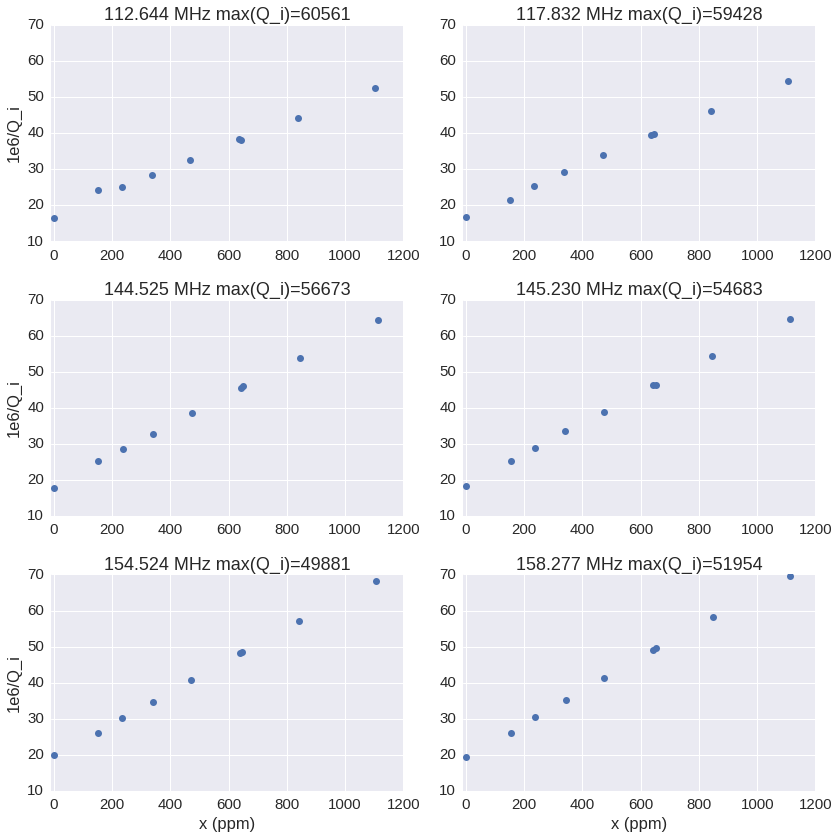

In [123]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==27)]
    ax.plot(1e6*(1-dd.res_f_0/dd.res_f_0.max()),1e6/dd.res_Q_i,'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(-10,1200)
    ax.set_ylim(10,70)
for ax in axs[:,0]:
    ax.set_ylabel('1e6/Q_i')
for ax in axs[-1,:]:
    ax.set_xlabel('x (ppm)')
fig.tight_layout()

In [95]:
from kid_readout.equipment import starcryo_temps

In [74]:
pkg,_,load,_=starcryo_temps.get_temperatures_at(valid.start_epoch)

In [75]:
def get_package_temperature(ts):
    return np.interp(ts,valid.start_epoch,pkg)

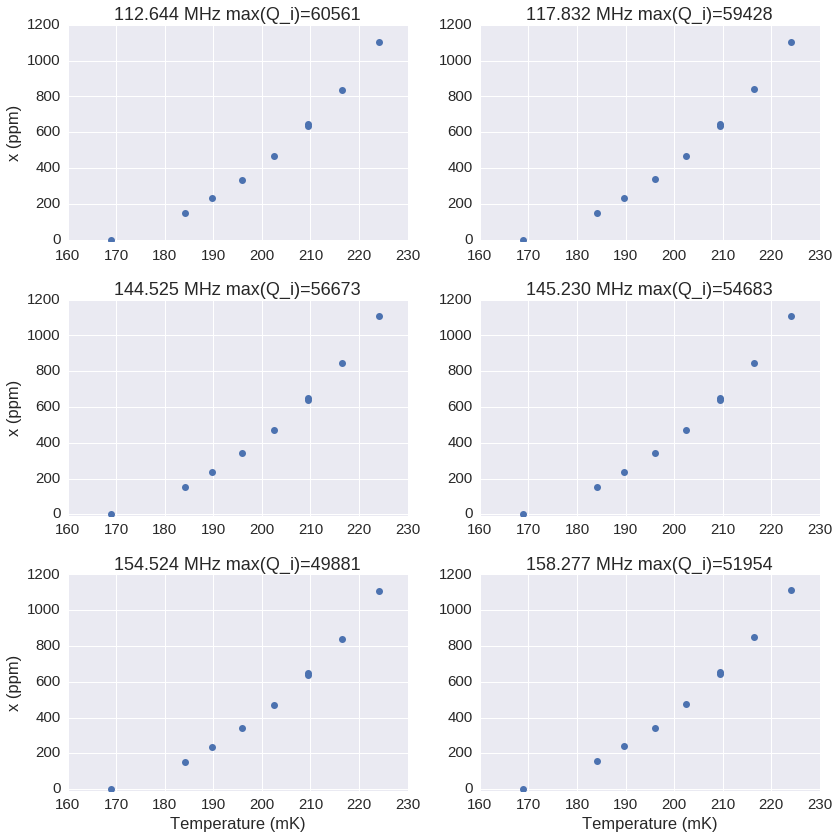

In [124]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==27)]
    ax.plot(get_package_temperature(dd.start_epoch)*1e3,1e6*(1-dd.res_f_0/dd.res_f_0.max()),'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(160,230)
    ax.set_ylim(-10,1200)
for ax in axs[:,0]:
    ax.set_ylabel('x (ppm)')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

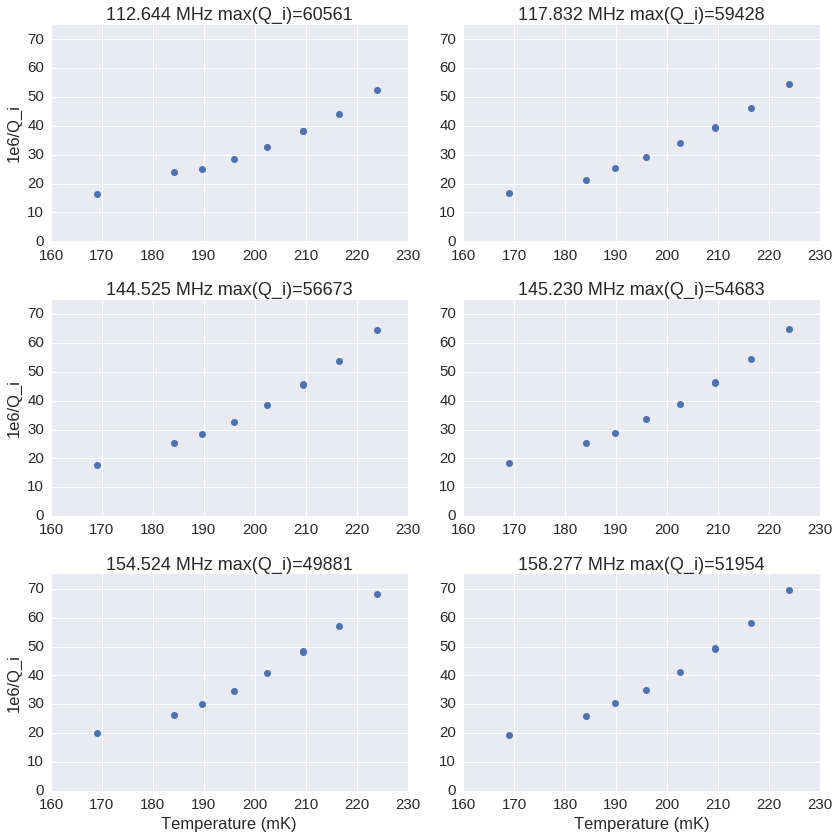

In [126]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==27)]
    ax.plot(get_package_temperature(dd.start_epoch)*1e3,1e6/dd.res_Q_i,'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(160,230)
    ax.set_ylim(0,75)
for ax in axs[:,0]:
    ax.set_ylabel('1e6/Q_i')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

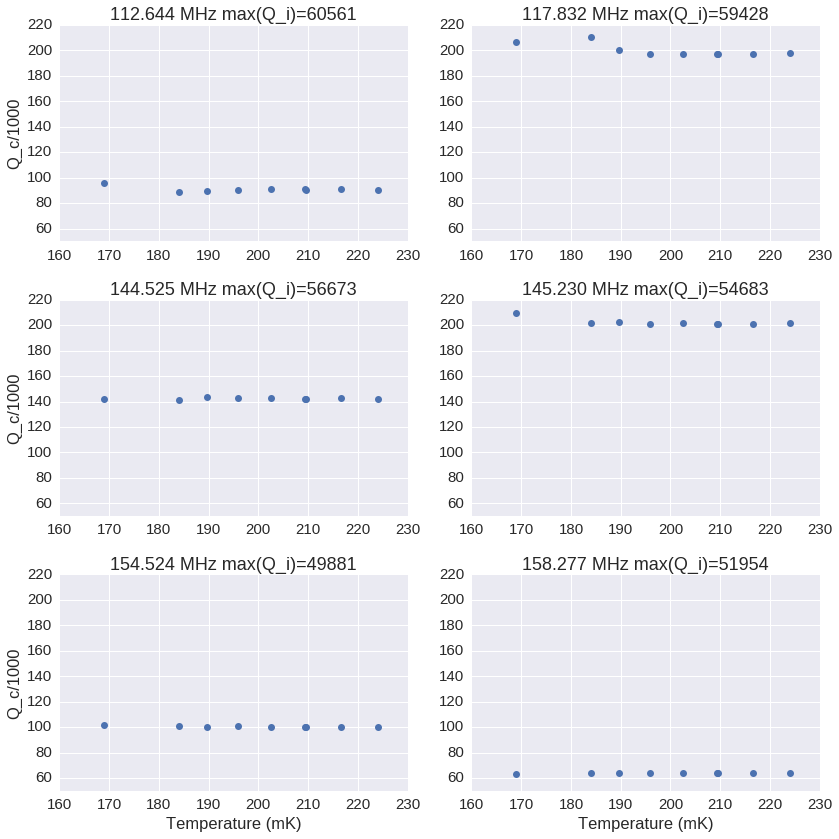

In [166]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==27)]
    ax.plot(get_package_temperature(dd.start_epoch)*1e3,1e-3/np.real(1/dd.res_Q_e),'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(160,230)
    ax.set_ylim(50,220)
for ax in axs[:,0]:
    ax.set_ylabel('Q_c/1000')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

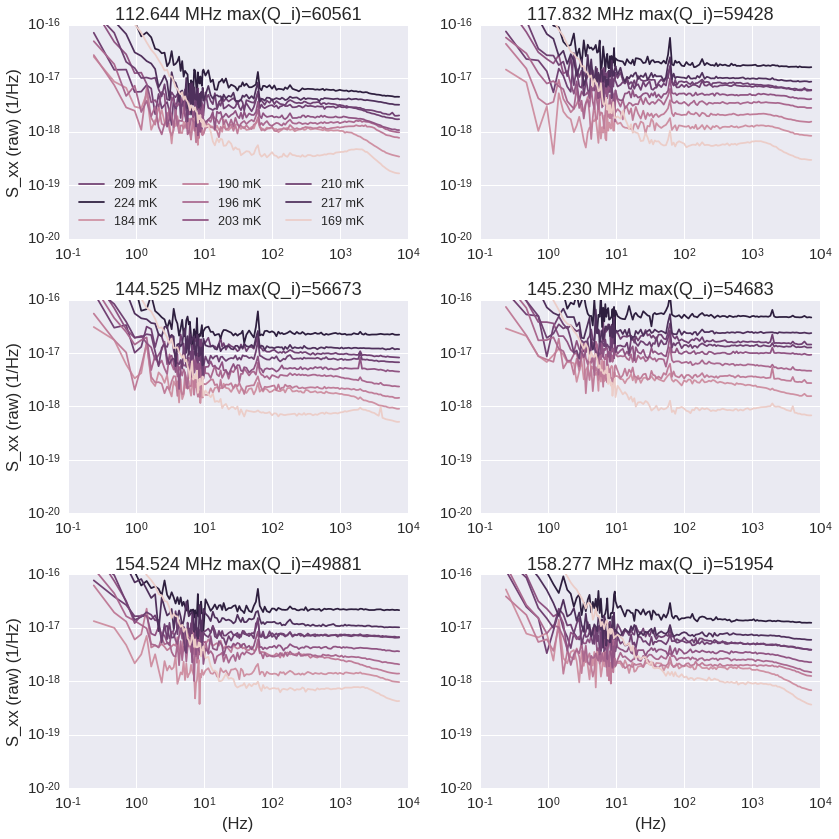

In [139]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==27)]
    for m,row in dd.iterrows():
        ax.loglog(row.S_frequency,row.S_xx,
                  color = pal((get_package_temperature(row.start_epoch)-pkg.min())/pkg.ptp()),
                 label=('%.0f mK' % (1e3*get_package_temperature(row.start_epoch))))
    ax.set_ylim(1e-20,1e-16)
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
for ax in axs[:,0]:
    ax.set_ylabel('S_xx (raw) (1/Hz)')
for ax in axs[-1,:]:
    ax.set_xlabel('(Hz)')
axs[0,0].legend(loc='lower left',prop=dict(size='x-small'),ncol=3)
fig.tight_layout()

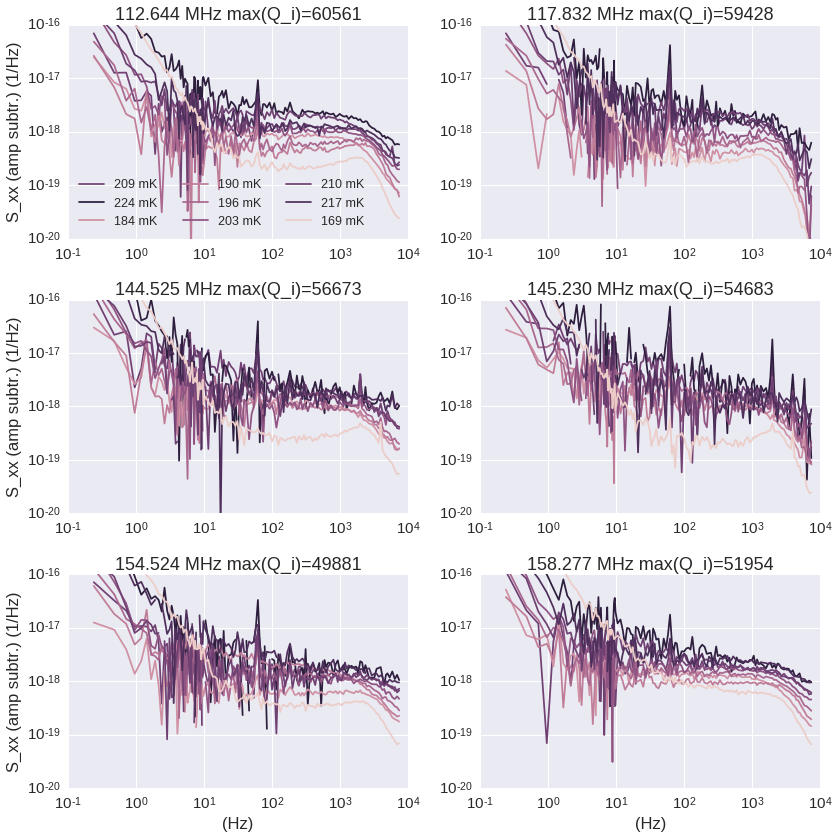

In [140]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==27)]
    for m,row in dd.iterrows():
        ax.loglog(row.S_frequency,row.S_xx-np.median(row.S_yy),
                  color = pal((get_package_temperature(row.start_epoch)-pkg.min())/pkg.ptp()),
                 label=('%.0f mK' % (1e3*get_package_temperature(row.start_epoch))))
    ax.set_ylim(1e-20,1e-16)
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
for ax in axs[:,0]:
    ax.set_ylabel('S_xx (amp subtr.) (1/Hz)')
for ax in axs[-1,:]:
    ax.set_xlabel('(Hz)')
axs[0,0].legend(loc='lower left',prop=dict(size='x-small'),ncol=3)
fig.tight_layout()

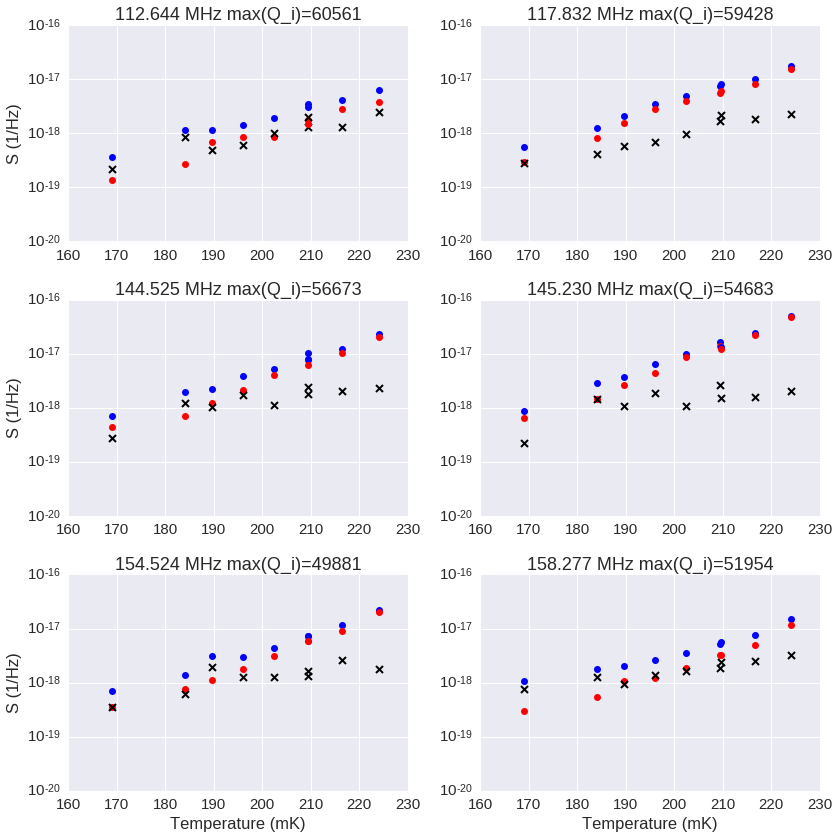

In [145]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==27)]
    for m,row in dd.iterrows():
        mask = (row.S_frequency>100) & (row.S_frequency<500)
        ax.semilogy(get_package_temperature(row.start_epoch)*1e3,np.median(row.S_xx[mask]),'bo')
        ax.semilogy(get_package_temperature(row.start_epoch)*1e3,np.median(row.S_yy[mask]),'ro')
        ax.semilogy(get_package_temperature(row.start_epoch)*1e3,np.median(row.S_xx[mask])-np.median(row.S_yy[mask]),'kx',mew=2)
    ax.set_ylim(1e-20,1e-16)
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
for ax in axs[:,0]:
    ax.set_ylabel('S (1/Hz)')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

In [150]:
ax.legend?

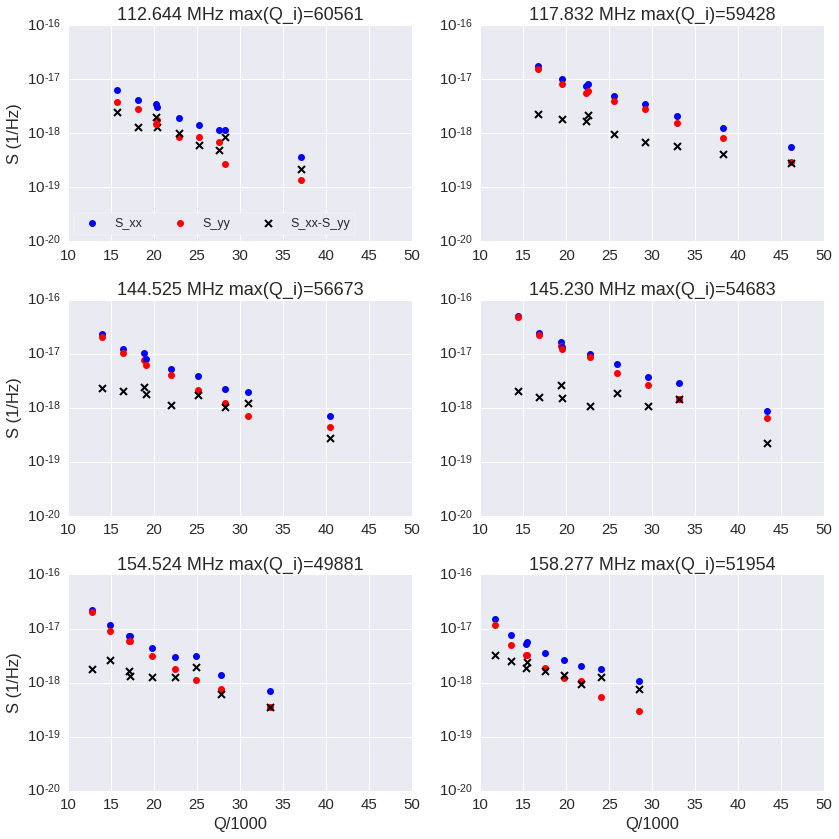

In [159]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==27)]
    for m,row in dd.iterrows():
        mask = (row.S_frequency>100) & (row.S_frequency<500)
        ax.semilogy(row.res_Q/1e3,np.median(row.S_xx[mask]),'bo')
        ax.semilogy(row.res_Q/1e3,np.median(row.S_yy[mask]),'ro')
        ax.semilogy(row.res_Q/1e3,np.median(row.S_xx[mask])-np.median(row.S_yy[mask]),'kx',mew=2)
    ax.set_ylim(1e-20,1e-16)
    ax.set_xlim(10,50)
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
for ax in axs[:,0]:
    ax.set_ylabel('S (1/Hz)')
for ax in axs[-1,:]:
    ax.set_xlabel('Q/1000')
axs[0,0].legend(['S_xx','S_yy','S_xx-S_yy'],loc='lower left',prop=dict(size='x-small'),ncol=3,frameon=True)
fig.tight_layout()

In [77]:
dd = valid[(valid.number==0) & (valid.roach_dac_attenuation==27)]

In [78]:
dd.res_Q

56     20346.530352
88     15744.751448
152    28215.224097
184    27567.156691
216    25275.241635
248    22931.541892
280    20217.744861
312    18111.988795
344    37084.954803
Name: res_Q, dtype: float64